In [56]:
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt

from py4DSTEM.process.braggdiskdetection import get_synthetic_probe

from py4DSTEM.process.braggdiskdetection import get_probe_kernel
from py4DSTEM.process.braggdiskdetection import get_probe_kernel_subtrgaussian
from py4DSTEM.process.braggdiskdetection import get_probe_kernel_logistictrench

from py4DSTEM.process.braggdiskdetection import find_Bragg_disks_single_DP, find_Bragg_disks_selected

In [5]:
fp = "/home/ben/Data/20190128_ClassificationData/EASY_binDiffraction4.h5"
dc = py4DSTEM.file.io.read(fp)

/home/ben/Data/20190128_ClassificationData/EASY_binDiffraction4.h5 is a py4DSTEM file, v0.3. Reading...


In [6]:
ave_im = np.average(dc.data4D,axis=(2,3))

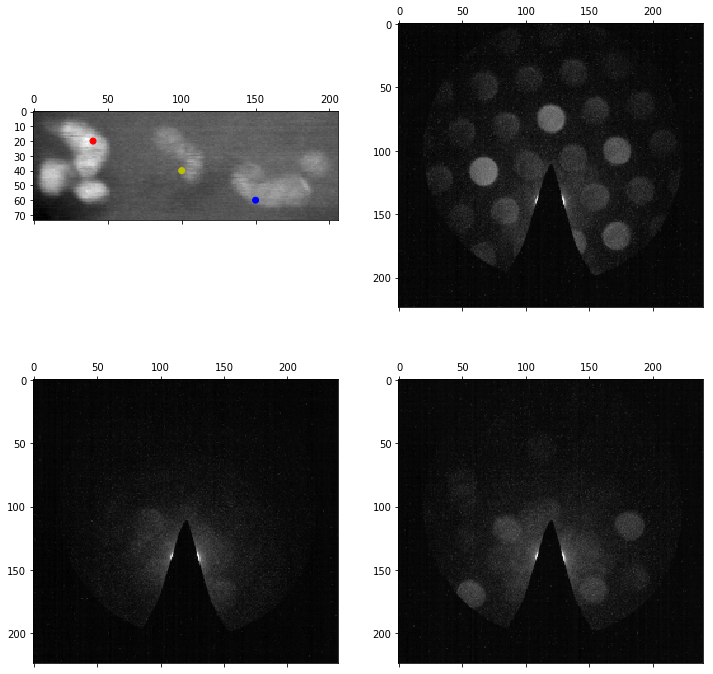

In [7]:
rx=(20,40,60)
ry=(40,100,150)
power = 0.05

fig,((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2,figsize=(12,12))
ax11.matshow(ave_im)
ax11.scatter(ry,rx, color=('r','y','b'))
ax12.matshow(dc.data4D[rx[0],ry[0],:,:]**power)
ax21.matshow(dc.data4D[rx[1],ry[1],:,:]**power)
ax22.matshow(dc.data4D[rx[2],ry[2],:,:]**power)
plt.show()

In [42]:
# Make a synthetic probe

radius = 10
#width = 2
#sigma_probe_scale = 2.5
trenchwidth=4
blurwidth=2

probe = get_synthetic_probe(dc.Q_Nx, dc.Q_Ny, radius=radius, width=width)
#probe_kernel = get_probe_kernel_subtrgaussian(probe, sigma_probe_scale=sigma_probe_scale)
probe_kernel = get_probe_kernel_logistictrench(probe, radius=radius,
                                                      trenchwidth=trenchwidth,
                                                      blurwidth=blurwidth)

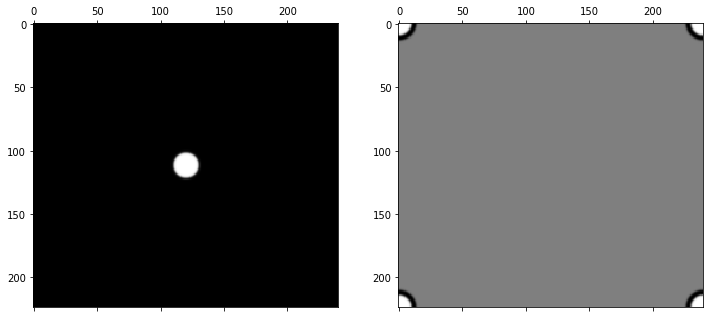

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.matshow(probe)
ax2.matshow(probe_kernel)
plt.show()

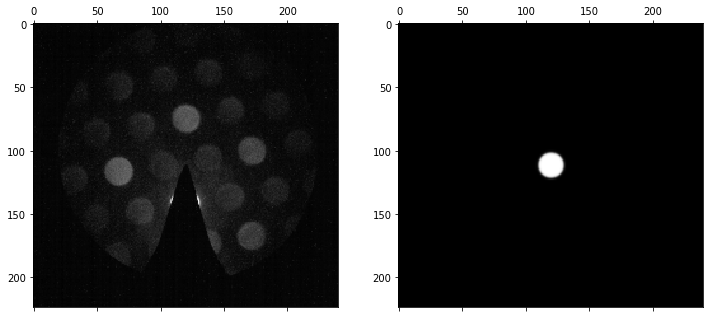

In [24]:
# Let's optimize our probe for the DP at (20,40)

rx,ry = 20,40

DP = dc.data4D[rx,ry,:,:]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.matshow(DP**0.2)
ax2.matshow(probe)
plt.show()

In [29]:
# Get peaks

corrPower = 0.8
sigma = 2
edgeBoundary = 20
maxNumPeaks = 70
minPeakSpacing = 50
minRelativeIntensity = 0.001

peaks = find_Bragg_disks_single_DP(DP, probe_kernel,
                                   corrPower=corrPower,
                                   sigma=sigma,
                                   edgeBoundary=edgeBoundary,
                                   minRelativeIntensity=minRelativeIntensity,
                                   minPeakSpacing=minPeakSpacing,
                                   maxNumPeaks=maxNumPeaks)

In [33]:
peaks.sort('intensity','descending')
peaks.data['intensity']

array([204.37913206, 181.84778293, 105.13025143,  92.61665463,
        16.09283205,  15.75877716,   1.14650062,   0.59839549])

In [37]:
score1 = np.sum(peaks.data['intensity'][:5])
score2 = score1 / radius**2

In [68]:
# Determine best radius

radii = np.arange(5,20)
#width = 2
#sigma_probe_scale = 2.5
trenchwidth=4
blurwidth=2

corrPower = 0.9
sigma = 2
edgeBoundary = 20
maxNumPeaks = 70
minPeakSpacing = 30
minRelativeIntensity = 0.001

scores = np.zeros_like(radii)
for i in range(len(radii)):
    radius = radii[i]
    
    # Get probe
    probe = get_synthetic_probe(dc.Q_Nx, dc.Q_Ny, radius=radius, width=width)
    #probe_kernel = get_probe_kernel_subtrgaussian(probe, sigma_probe_scale=sigma_probe_scale)
    probe_kernel = get_probe_kernel_logistictrench(probe, radius=radius,
                                                      trenchwidth=trenchwidth,
                                                      blurwidth=blurwidth)
    # Get peaks
    peaks = find_Bragg_disks_single_DP(DP, probe_kernel,
                                   corrPower=corrPower,
                                   sigma=sigma,
                                   edgeBoundary=edgeBoundary,
                                   minRelativeIntensity=minRelativeIntensity,
                                   minPeakSpacing=minPeakSpacing,
                                   maxNumPeaks=maxNumPeaks)
    
    # Calculate score
    peaks.sort('intensity','descending')
    scores[i] = np.sum(peaks.data['intensity'][:5])

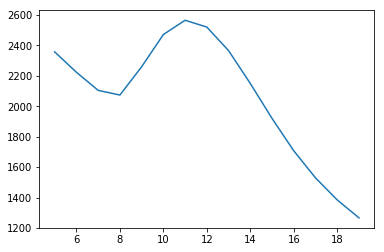

In [69]:
fig,ax=plt.subplots()
ax.plot(radii,scores)
plt.show()

In [70]:
radius = 11

In [71]:
# Determine best width

radius = 11
widths = np.arange(1,8)
sigma_probe_scale = 2.5

corrPower = 0.9
sigma = 2
edgeBoundary = 20
maxNumPeaks = 70
minPeakSpacing = 30
minRelativeIntensity = 0.001

scores = np.zeros_like(widths)
for i in range(len(widths)):
    width=widths[i]
    
    # Get probe
    probe = get_synthetic_probe(dc.Q_Nx, dc.Q_Ny, radius=radius, width=width)
    probe_kernel = get_probe_kernel_subtrgaussian(probe, sigma_probe_scale=sigma_probe_scale)

    # Get peaks
    peaks = find_Bragg_disks_single_DP(DP, probe_kernel,
                                   corrPower=corrPower,
                                   sigma=sigma,
                                   edgeBoundary=edgeBoundary,
                                   minRelativeIntensity=minRelativeIntensity,
                                   minPeakSpacing=minPeakSpacing,
                                   maxNumPeaks=maxNumPeaks)
    
    # Calculate score
    peaks.sort('intensity','descending')
    scores[i] = np.sum(peaks.data['intensity'][:5])

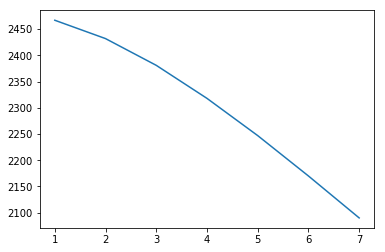

In [72]:
fig,ax=plt.subplots()
ax.plot(widths,scores)
plt.show()

#### Check probe

In [73]:
radius=11
width=1
sigma_probe_scale=2.5

probe = get_synthetic_probe(dc.Q_Nx, dc.Q_Ny, radius=radius, width=width)
probe_kernel = get_probe_kernel_subtrgaussian(probe, sigma_probe_scale=sigma_probe_scale)

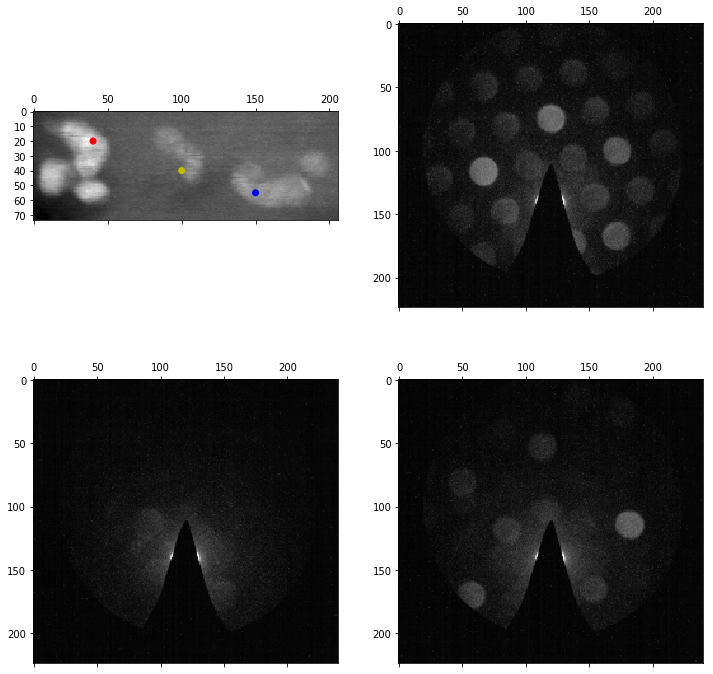

In [79]:
rx=(20,40,55)
ry=(40,100,150)
power = 0.05

fig,((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2,figsize=(12,12))
ax11.matshow(ave_im)
ax11.scatter(ry,rx, color=('r','y','b'))
ax12.matshow(dc.data4D[rx[0],ry[0],:,:]**power)
ax21.matshow(dc.data4D[rx[1],ry[1],:,:]**power)
ax22.matshow(dc.data4D[rx[2],ry[2],:,:]**power)
plt.show()

In [80]:
# Get peaks

corrPower = 0.9
sigma = 2
edgeBoundary = 20
maxNumPeaks = 70
minPeakSpacing = 30
minRelativeIntensity = 0.001

peaks = find_Bragg_disks_selected(dc, probe_kernel, rx, ry,
                                  corrPower=corrPower,
                                  sigma=sigma,
                                  edgeBoundary=edgeBoundary,
                                  minRelativeIntensity=minRelativeIntensity,
                                  minPeakSpacing=minPeakSpacing,
                                  maxNumPeaks=maxNumPeaks)

Analyzed 3 diffraction patterns in 0h 0m 0s


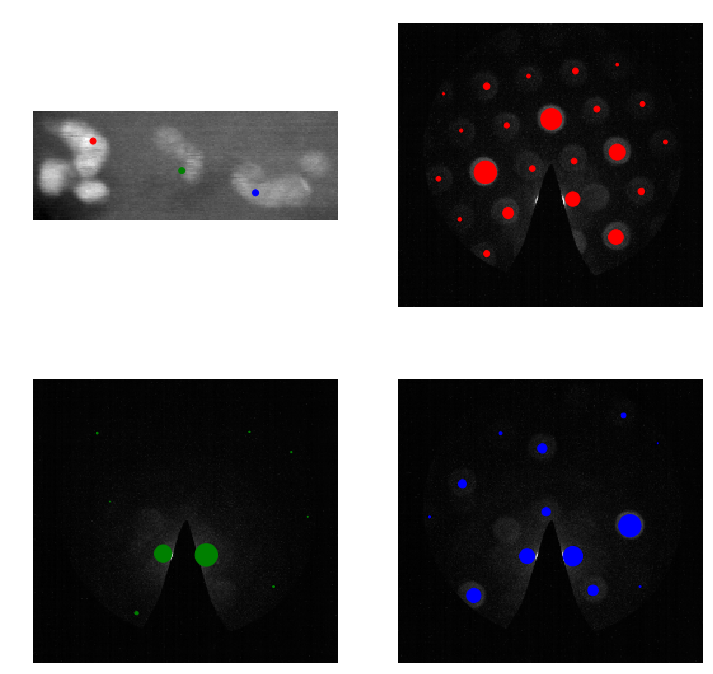

In [81]:
# Show

power=0.3
size_scale_factor = 500       # Set to zero to make all points the same size

fig,((ax11,ax12),(ax21,ax22))=plt.subplots(2,2,figsize=(12,12))
ax11.matshow(ave_im)
ax11.scatter(ry,rx,color=('r','g','b'))
ax12.matshow(dc.data4D[rx[0],ry[0],:,:]**power)
ax21.matshow(dc.data4D[rx[1],ry[1],:,:]**power)
ax22.matshow(dc.data4D[rx[2],ry[2],:,:]**power)

if size_scale_factor == 0:
    ax12.scatter(peaks[0].data['qy'],peaks[0].data['qx'],color='r')
    ax21.scatter(peaks[1].data['qy'],peaks[1].data['qx'],color='g')
    ax22.scatter(peaks[2].data['qy'],peaks[2].data['qx'],color='b')
else:
    ax12.scatter(peaks[0].data['qy'],peaks[0].data['qx'],color='r',s=size_scale_factor*peaks[0].data['intensity']/np.max(peaks[0].data['intensity']))
    ax21.scatter(peaks[1].data['qy'],peaks[1].data['qx'],color='g',s=size_scale_factor*peaks[1].data['intensity']/np.max(peaks[1].data['intensity']))
    ax22.scatter(peaks[2].data['qy'],peaks[2].data['qx'],color='b',s=size_scale_factor*peaks[2].data['intensity']/np.max(peaks[2].data['intensity']))


ax11.axis('off')
ax12.axis('off')
ax21.axis('off')
ax22.axis('off')
plt.show()

#### Save probe

In [84]:
probe_diffractionslice = py4DSTEM.file.datastructure.DiffractionSlice(data=np.zeros((dc.Q_Nx,dc.Q_Ny,2)),
                                                                      slicelabels=('probe','probe_kernel'))

probe_diffractionslice.data2D['probe'] = probe
probe_diffractionslice.data2D['probe_kernel'] = probe_kernel

In [87]:
fp = "/home/ben/Data/20190128_ClassificationData/EASY_binDiffraction4.h5"
py4DSTEM.file.io.append(probe_diffractionslice, fp)

Opening file /home/ben/Data/20190128_ClassificationData/EASY_binDiffraction4.h5...
Done.
